In [1]:
import classes, sigma
parameters = classes.Empty()
start_position = classes.PosAndTime()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Делаю пункты 1 и 2 из файла Задание по пункту 9.4.pdf (от 1 апреля)
Строю график зависимости длины вектора смещения от точки старта от времени + теоретическая зависимость sqrt(6Dt)

In [2]:
# Одна частица: 
# Параметры модели:
parameters.lmbda = 1               # Целевая средняя длина свободного пробега
parameters.velocity = 1            # Скорость (одинаковая для всех частиц и всех моментов времени)
parameters.sigma = sigma.halfcos   # Сечение рассеивания (const, halfsin или halfcos)

start_guide_cosines = classes.GuideCosines \
        (a=0.5, c=0.5, b=0.5**0.5) # Направляющие косинусы при t = 0

time_limit = 1000                  # Время моделирования в единицах лямбда / v 

Text(0.5, 1.0, 'Зависимость от времени расстояния до центра для одной частицы')

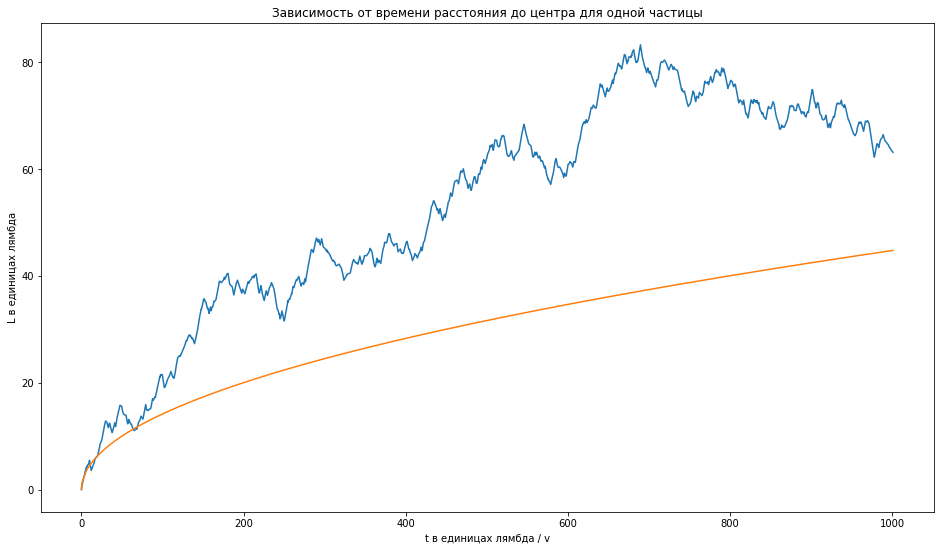

In [3]:
import cycles
one_particle_path = cycles.simulate_one_particle(parameters, start_position, start_guide_cosines, time_limit)
#one_particle_path :: [{x, y, z, t}]

distances = [obj.distance() for obj in one_particle_path]
times     = [obj.t          for obj in one_particle_path]

import theory
theory.setParameters(parameters)
predictions = list(map(theory.distance, times))

from matplotlib import pyplot as plt
plt.figure(figsize=(16,9))
plt.plot(times, distances, times, predictions)
plt.xlabel("t в единицах лямбда / v")
plt.ylabel("L в единицах лямбда")
plt.title("Зависимость от времени расстояния до центра для одной частицы")


Делаю пункты 3 и 4 из файла Задание по пункту 9.4.pdf (от 1 апреля)
Среднее смещение для большого числа электронов, причем с разными вариантами дифференциального сечения рассеяния

In [4]:
# Много частиц:
# Параметры модели
Nparticles = 5000                   # Число частиц             
parameters.lmbda = 1               # Целевая средняя длина свободного пробега
parameters.velocity = 1            # Скорость (одинаковая для всех частиц и всех моментов времени)
start_guide_cosines = classes.GuideCosines \
        (a=0.5, c=0.5, b=0.5**0.5) # Направляющие косинусы при t = 0

time_limit = 100                 # Время моделирования в единицах лямбда / v

In [5]:
# сигма(тета) = const:
parameters.sigma = sigma.const
ararc = cycles.simulate_multiple_particles(parameters, Nparticles, start_position, start_guide_cosines, time_limit)

In [6]:
tar, marc = cycles.mean(ararc, time_limit, lambda obj : obj.distance())

In [7]:
# сигма(тета) = sin(тета / 2):
parameters.sigma = sigma.halfsin
ararhs = cycles.simulate_multiple_particles(parameters, Nparticles, start_position, start_guide_cosines, time_limit)

In [8]:
tar, marhs = cycles.mean(ararhs, time_limit, lambda obj : obj.distance())

In [9]:
# сигма(тета) = cos(тета / 2):
parameters.sigma = sigma.halfcos
ararhc = cycles.simulate_multiple_particles(parameters, Nparticles, start_position, start_guide_cosines, time_limit)

In [10]:
tar, marhc = cycles.mean(ararhc, time_limit, lambda obj : obj.distance())

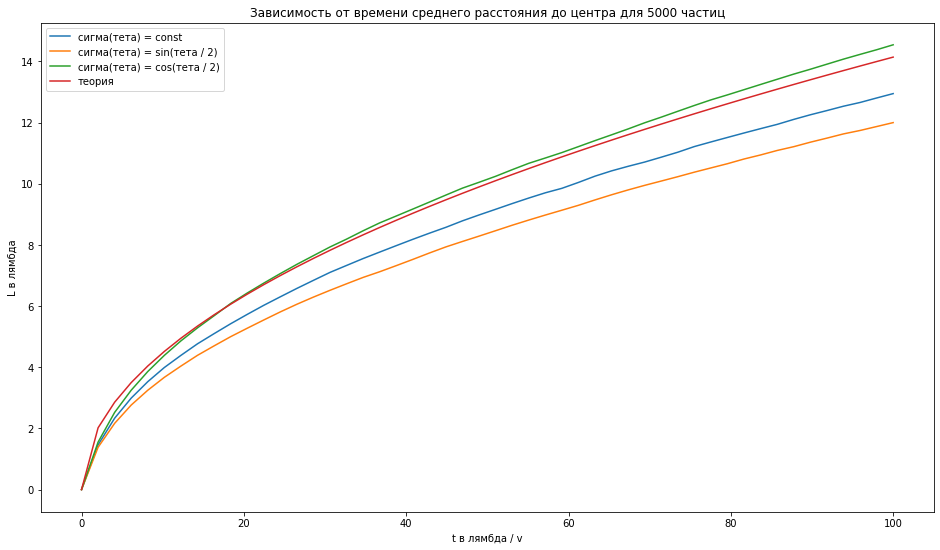

In [11]:
predictions = [theory.distance(t) for t in tar]

plt.figure(figsize=(16,9))
plt.plot(tar, marc,  label="сигма(тета) = const")
plt.plot(tar, marhs, label="сигма(тета) = sin(тета / 2)")
plt.plot(tar, marhc, label="сигма(тета) = cos(тета / 2)")
plt.plot(tar, predictions, label="теория")

plt.xlabel("t в лямбда / v")
plt.ylabel("L в лямбда")
plt.title(f"Зависимость от времени среднего расстояния до центра для {Nparticles} частиц")
plt.legend()

Пункт 3 из файла Формула.jpg (от 15 апреля)
Средний квадрат смещения электронов по координате x от времени

In [12]:
tar, marc2  = cycles.mean(ararc,  time_limit, lambda obj : obj.x ** 2)
tar, marhs2 = cycles.mean(ararhs, time_limit, lambda obj : obj.x ** 2)
tar, marhc2 = cycles.mean(ararhc, time_limit, lambda obj : obj.x ** 2)

predictions2 = [theory.x2(t) for t in tar]

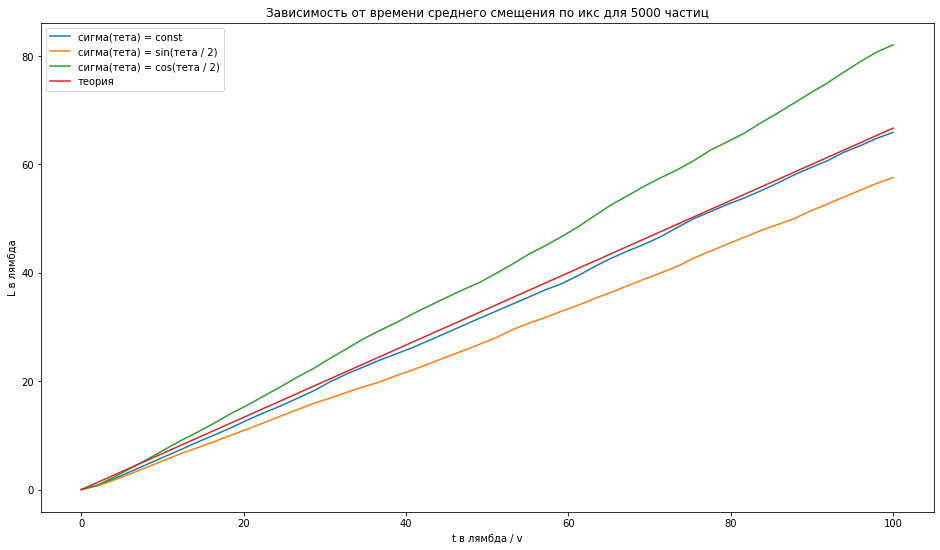

In [13]:
plt.figure(figsize=(16,9))
plt.plot(tar, marc2,  label="сигма(тета) = const")
plt.plot(tar, marhs2, label="сигма(тета) = sin(тета / 2)")
plt.plot(tar, marhc2, label="сигма(тета) = cos(тета / 2)")
plt.plot(tar, predictions2, label="теория")

plt.xlabel("t в лямбда / v")
plt.ylabel("L в лямбда")
plt.title(f"Зависимость от времени среднего смещения по икс для {Nparticles} частиц")
plt.legend()

Делаю все пункты из файла Задание 4.pdf (от 9 апреля)
Они совпадают с пунктами 1-2 файла Формула.jpg (от 15 апреля)
Надо построить функцию распределения

Функция распределения для случайной величины r - это F(x):= p(r < x)
Поэтому она существует только в случае, если для случайной величины определена операция "<"
В нашем случае случайная величина - это вектор положения частицы. Векторы нельзя сравнивать между собой

Функции распределения поэтому не существует. Но я построил плотность вероятности, отбросив переменную z:

In [14]:
t = 96                                         # момент времени, в который строим распределение
(cs, z) = cycles.xyDistribution(ararhc, t, 16) # cs = numpy.linspace(min, max)
# ararc  - сигма(тета) = const
# ararhs - сигма(тета) = sin(тета / 2)
# ararhc - сигма(тета) = cos(тета / 2)

In [15]:
#%matplotlib qt

Text(0.5, 0.92, 'Оценка плотности вероятности по 5000 частиц при t = 96')

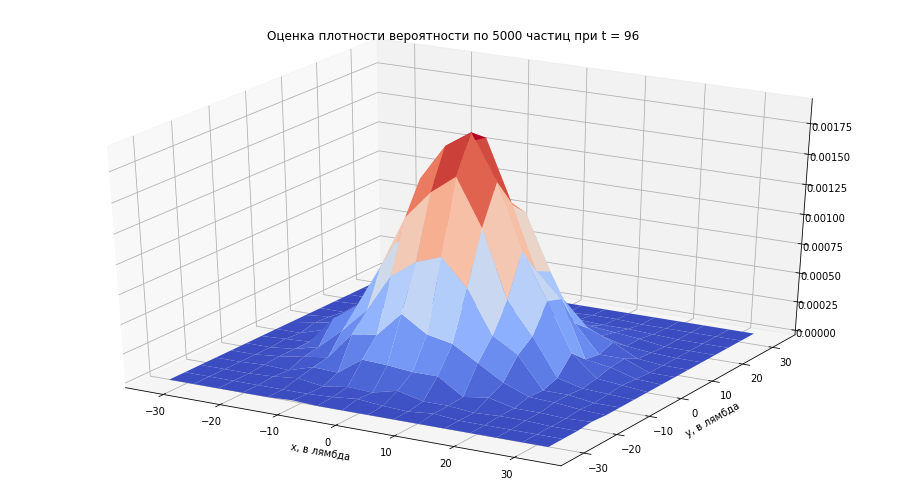

In [16]:
from numpy import meshgrid
x, y = meshgrid(cs, cs)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x,y,z,cmap=cm.coolwarm)
plt.xlabel("x, в лямбда")
plt.ylabel("y, в лямбда")
plt.title(f"Оценка плотности вероятности по {Nparticles} частиц при t = {t}")

Text(0.5, 0.92, 'Теоретическая плотность вероятности')

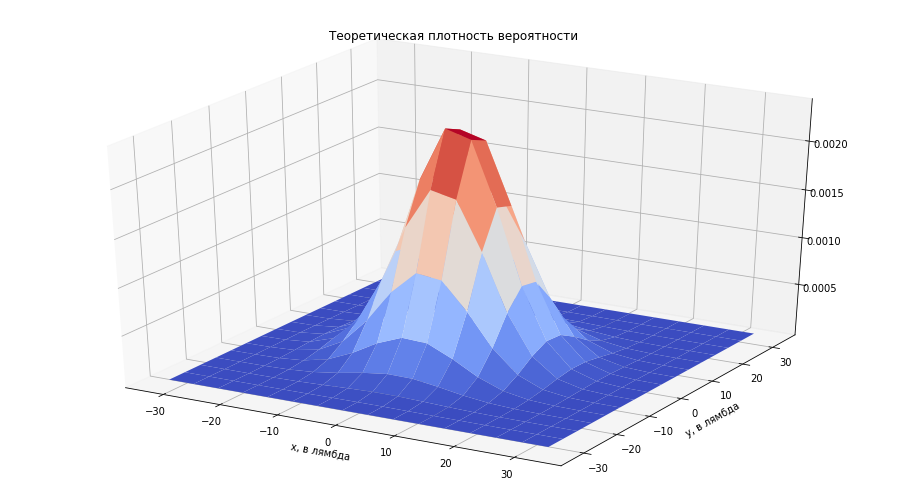

In [17]:
densityPredictions = theory.probabilityDensity(cs, t)

x, y = meshgrid(cs, cs)
fig = plt.figure(figsize=(16,9))
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(x,y, densityPredictions, cmap=cm.coolwarm)
plt.xlabel("x, в лямбда")
plt.ylabel("y, в лямбда")
plt.title("Теоретическая плотность вероятности")